## About classes and functions ... everything is an object

A wealth of great intros to object oriented programming can be found on YouTube ("e.g. search: python object classes")


### Object ... what?

Python is entirely object oriented. This means that basically *everything* you deal with in python is a so called object. Let's dive into some example ...

**It's worth and good practice to learn object oriented python programming from the very beginning. It will make your life so much easier!!!!**


In [5]:
# The CAR example

class Car(object):
    def __init__(self, **kwargs):
        self.pos = kwargs.get('pos', (0., 0.))
        self._plot_offset = kwargs.get('offset', 1.)
        self.speed = kwargs.get('speed', None)
        assert self.speed is not None
    
    def move(self, dt):
        """
        with this routine you can move the car depending on its speed
        and time difference dt [hours]
        """
        self.pos = self._get_new_position(dt)
  
    
    def _get_new_position(self, dt):   # this would need to go in the move function
        """
        calculate new position and return as tuple
        """
        return (self.pos[0] + self.speed * dt, self._plot_offset)
    
    
C = Car(speed=2.)

In [2]:
# how to get information on Car?
help(C)

Help on Car in module __main__ object:

class Car(__builtin__.object)
 |  Methods defined here:
 |  
 |  __init__(self)
 |  
 |  move(self)
 |      with this routine you can move the car
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



## Car race

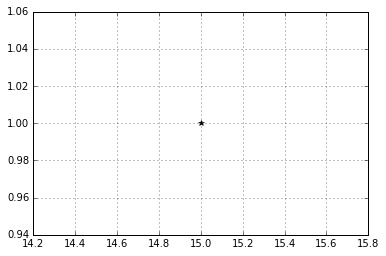

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt  # this module is used for plotting (... see next week course)

# o.k. now let's create some different cars with different properties ...
# ... calculate the position of the car as function of time

class Racer(Car):
    
    def __init__(self, **kwargs):
        super(Racer, self).__init__(**kwargs)
        self._init_figure(**kwargs)
        self.color = kwargs.get('color', 'black')
        self.marker = kwargs.get('marker', '*')
        
    def _init_figure(self, **kwargs):
        self.ax = kwargs.get('ax', None)
        if self.ax is None:
            fig = plt.figure()
            self.ax = fig.add_subplot(111)
            self.ax.grid()
        
    def plot(self):
        """
        Parameters
        ----------
        dt : float
            time difference [h]
        """
        self.ax.plot(self.pos[0], self.pos[1], marker=self.marker, color=self.color)
        

        

R = Racer(speed=5.)
R.move(3.)
R.plot()
        




### let's play with different cars now ...

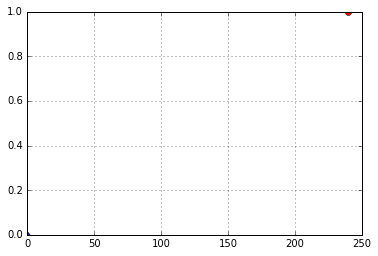

In [28]:
class RedBeetle(Racer):
    def __init__(self, **kwargs):
        super(RedBeetle, self).__init__(color='red', marker='o', speed=120., **kwargs)

class MyOldBike(Racer):
    def __init__(self, **kwargs):
        super(MyOldBike, self).__init__(color='blue', marker='d', speed=20., **kwargs)
        
RB = RedBeetle()
MyBike = MyOldBike(ax=RB.ax)

RB.move(2.)

RB.plot()
MyBike.plot()

# try to move and plot for all the objects ... how could that be done?

### Let's play chess

* [Some simple example](https://codereview.stackexchange.com/questions/101574/chess-game-in-python)
* [Some very advanced library](https://github.com/niklasf/python-chess)

So let's dive into it ... what do we need to be able to play chess?